# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Project 3: Web APIs & NLP

## Importing libraries

In [1]:
import time
import pandas as pd
import requests
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate,train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

##  Web Scraping

In [2]:
df = pd.DataFrame()

In [3]:
urls = ['https://api.pushshift.io/reddit/search/comment?subreddit=iphone',
        'https://api.pushshift.io/reddit/search/comment?subreddit=android']

In [4]:
# print("Starting Web-scraping")
# code = 0
# for day in range(1,76):
#     for url in urls:
#         param = f'&after={day+1}d&before={day}d&size=100'
#         new_url =  url+param
#         res = requests.get(new_url)
#         assert res.status_code == 200
#         data = res.json()['data']
#         temp = pd.DataFrame(data)[['id','author','author_premium','score','body','subreddit']]
#         df = df.append(temp)
#         time.sleep(1)
#     print('\rScraping in progress......{0:.2f}%'.format((100/75)*(day)),end='')       
# print("\nData Collected Successfully")

In [ ]:
#To import the previously scrapped and cleaned data
df = pd.read_csv('output.csv')

In [5]:
df.head() 

,id,author,is_premium,score,body,subreddit
0,h5uhw70,qwertz1921,0,1,Im charging with an 20W charger. The phone was...,0
1,h5uie60,phixx79,0,2,"Battery life, honestly. Combine that with real...",0
2,h5uikxw,MrRaykes,0,1,iPhone 11 \n2021.04.12\n100%,0
3,h5uikz7,AnxiousBlock,0,2,keep it safe. Sell it on ebay after a decade o...,0
4,h5uin2j,miggyyusay,0,4,I just buy from Hong Kong and then bring it ba...,0


## Data Cleaning

In [6]:
df = df.dropna()

In [7]:
# for newly scrapped data
# df['subreddit'] = df['subreddit'].map({'iphone': 0, 'Android': 1}) 

In [8]:
# for newly scrapped data
# df['author_premium'] = df['author_premium'].astype(int)

In [9]:
# for newly scrapped data
# df.rename(columns = {'author_premium':'is_premium'}, inplace = True)

In [10]:
df.head()

,id,author,is_premium,score,body,subreddit
0,h5uhw70,qwertz1921,0,1,Im charging with an 20W charger. The phone was...,0
1,h5uie60,phixx79,0,2,"Battery life, honestly. Combine that with real...",0
2,h5uikxw,MrRaykes,0,1,iPhone 11 \n2021.04.12\n100%,0
3,h5uikz7,AnxiousBlock,0,2,keep it safe. Sell it on ebay after a decade o...,0
4,h5uin2j,miggyyusay,0,4,I just buy from Hong Kong and then bring it ba...,0


### Exporting Cleaned Data

In [11]:
# df.to_csv('output.csv', index = False)

## NLP

In [12]:
vectorizer = CountVectorizer(binary=True, max_df=0.95,stop_words = 'english')

In [13]:
vectorizer.fit(df['author']+''+df['body'])

CountVectorizer(analyzer='word', binary=True, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.95, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [14]:
vector = vectorizer.transform(df['author']+''+df['body'])

In [15]:
text_data = pd.DataFrame(vector.toarray(), columns = vectorizer.get_feature_names())

In [16]:
text_data.head()

,00,000,0000000000001,000004674180,00007777what,00008fz34,0000gkp,0000gkpif,0006,000mah,...,zzisrafelzzthe,zzsbqrfy6,zzsbqrfy6https,zzsbqrfy6you,イヤホンマイク端子,低情商,光线追踪,光追,指紋,高情商
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### EDA

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14031 entries, 0 to 14030
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          14031 non-null  object
 1   author      14031 non-null  object
 2   is_premium  14031 non-null  int64 
 3   score       14031 non-null  int64 
 4   body        14031 non-null  object
 5   subreddit   14031 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 767.3+ KB


In [18]:
df[['id','subreddit']].groupby(['subreddit']).count()

,id
subreddit,
0,7092
1,6939


### Top 5 Authors by No.of Comments

In [19]:
df[['id','author']].groupby(['author']).count().sort_values(by=['id'], ascending=False)[:5]

,id
author,
PJ09,596
Taskerbot,209
AutoModerator,142
dustojnikhummer,69
MrStruggleSnuggle,69


### Top 5 Comments by Scores

In [20]:
df[['score','author','body']].sort_values(by=['score'], ascending=False)[:5]

,score,author,body
4884,2950,Revris6,Check to see if there is a service provider na...
8758,1154,Duerogue,Should THAT ever catch fire on a plane you'll ...
13688,848,lo_fi_ho,Lol fucc the Zucc
2719,811,Mycomian,Jesus this dude really wanted to get past thos...
7747,723,Amilo159,"Google like stuff people are actively using, j..."


### Top 10 Authors by Total Comments Score

In [21]:
df[['score','author']].groupby(['author']).sum().sort_values(by=['score'], ascending=False)[:5]

,score
author,
Revris6,2950
Duerogue,1154
DutchBlob,965
lo_fi_ho,941
BigBrownHole36,918


In [22]:
# df[['score','id']].groupby(['score']).count().sort_values(by=['id'], ascending=False)[:10]

### Premium Users

In [23]:
df[['is_premium','id']].groupby(['is_premium']).count()

,id
is_premium,
0,13164
1,867


### Average Scores for Premium/non-premium Users

In [24]:
df[['is_premium','score']].groupby(['is_premium']).mean()

,score
is_premium,
0,8.591613
1,7.981546


### Distribution of Scores

Text(0, 0.5, 'Frequency')

<Figure size 1008x432 with 0 Axes>

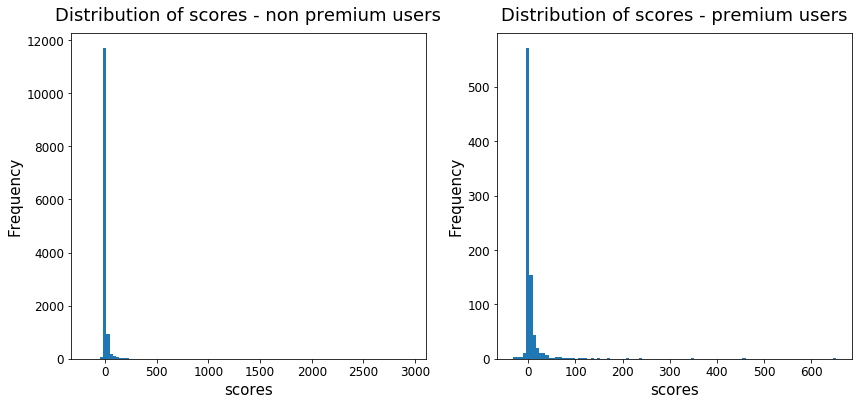

In [25]:
plt.figure(figsize = (14, 6))
plt.figure(figsize = (14, 6))

temp = df[df['is_premium']==False]
plt.subplot(1, 2, 1)
temp['score'].hist(bins = 100, grid = False, xlabelsize = 12, ylabelsize = 12)
plt.title('Distribution of scores - non premium users', fontsize = 18, pad = 12)
plt.xlabel("scores", fontsize = 15)
plt.ylabel("Frequency",fontsize = 15)

temp = df[df['is_premium']==True]
plt.subplot(1, 2, 2)
temp['score'].hist(bins = 100, grid = False, xlabelsize = 12, ylabelsize = 12)
plt.title('Distribution of scores - premium users', fontsize = 18, pad = 12)
plt.xlabel("scores", fontsize = 15)
plt.ylabel("Frequency",fontsize = 15)

#### Interpretation

From the above plots we can observe that the distribution of scores is right skewed for both premium and non-premium users. We can also note that non-premium users have higher scores.

### Top 10 words

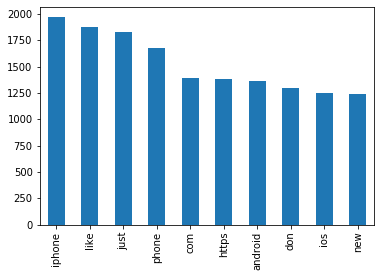

In [26]:
# sum_words = vector.sum(axis=0) 
# words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
# words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
# # words_freq[:10]
text_data.sum().sort_values(ascending=False).head(10).plot(x='',y='frequency', kind='bar');

### Top 10 Bigrams

In [27]:
data = text_data.drop([col for col in text_data.columns if len(col)!=2], axis=1)
data[data.sum().sort_values(ascending=False).index[:]].columns[:10]

Index(['gt', 've', '12', 'll', 'tv', '11', '10', 'os', '13', 'se'], dtype='object')

### Top 10 Trigrams

In [28]:
data = text_data.drop([col for col in text_data.columns if len(col)!=3], axis=1)
data[data.sum().sort_values(ascending=False).index[:]].columns[:10]

Index(['com', 'don', 'ios', 'new', 'www', 'use', 'app', 'pro', 'way', 'faq'], dtype='object')

## Feature and Output Selection

In [33]:
Y = df['subreddit']
X = text_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14031 entries, 0 to 14030
Columns: 29193 entries, 00 to 高情商
dtypes: int64(29193)
memory usage: 3.1 GB


## Spliting Test Train Data

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=43)

## Logistic Regression

In [35]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train,Y_train)
Y_pred = model.predict_proba(X_test)

In [36]:
Y_pred = [ 0 if item[0]>item[1] else 1 for item in Y_pred  ]

In [37]:
metrics.accuracy_score(Y_test, Y_pred)

0.7463182897862233

In [38]:
cross_validate(model, X_test, Y_test, cv=3)

{'fit_time': array([10.67379355, 12.97795033, 12.6844058 ]),
 'score_time': array([0.36503363, 0.29804254, 0.2890408 ]),
 'test_score': array([0.71367521, 0.73699216, 0.73271561])}

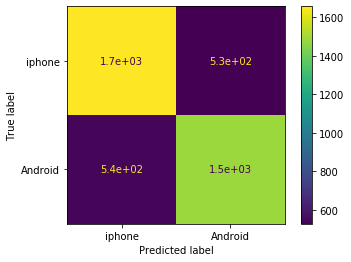

In [39]:
cm = confusion_matrix(Y_test, Y_pred)
ConfusionMatrixDisplay(cm,['iphone','Android']).plot()

#### Interpretation

From the confusion Matrix it is observed that false positives and false negatives are comparatively very small to the true values. 

## Random Forest Classifier

In [40]:
clf = RandomForestClassifier(n_estimators = 100)  
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

In [41]:
metrics.accuracy_score(Y_test, Y_pred)

0.732541567695962

In [42]:
cross_validate(clf, X_test, Y_test, cv=3)

{'fit_time': array([49.2276957 , 49.72672272, 49.73896098]),
 'score_time': array([0.5600431 , 0.61503601, 0.5570538 ]),
 'test_score': array([0.71937322, 0.71489665, 0.7191732 ])}

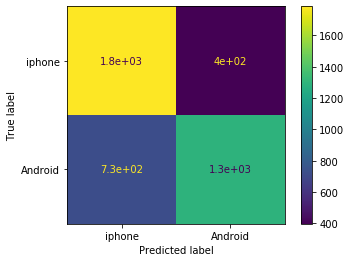

In [43]:
cm = confusion_matrix(Y_test, Y_pred)
ConfusionMatrixDisplay(cm,['iphone','Android']).plot()

#### Interpretation

From the confusion Matrix it is observed that false positives and false negatives are very small. 

## Conclusion

From the Observation of various evaluation parameters such as accuracy, cross validation and confusion matrix, it is seen that there is a significant difference in performance of Logistic Regression model and Random Forest Classifier. Both the models performs well with the test data with >70% accuracy. At times we can observe similar performance from both the model. The Logistic regression model performance is consistent and have better accuracy.

This solution can be enhanced and used in various social media platforms and forums to classify the genuine post from the violent ones. Further the genuine post can be tagged to the appropriate classes.

|Feature|Type|Description|
|---|---|---|
|id|object|Comment ID|
|author|object|Name of the Author| 
|is_premium|int|Is the Author premium user or not| 
|score|int|Comment score| 
|body|object|Text content of the Comment| 
|subreddit|int|post category 0-iphone, 1-Android| 